In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [1.0, 1.0, 1.0]  # Initial state of the system

Text(0.5, 0.92, 'solve_ivp')

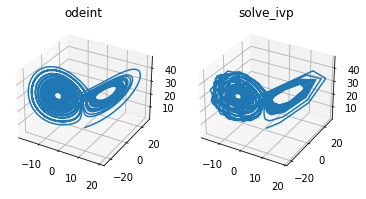

In [2]:
t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01)
 
result_odeint = odeint(lorenz, y0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p)
 
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
ax.set_title("odeint")
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")

In [3]:
t.shape
# (4000,)
 
result_odeint.shape
# (4000, 3)
 
result_solve_ivp.t.shape
# (467,)

(467,)

Text(0.5, 0.92, 'LSODA')

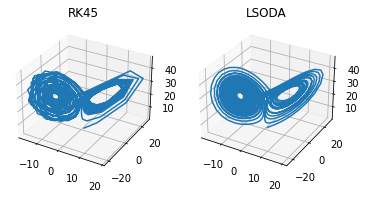

In [4]:
solve_ivp_rk45 = solve_ivp(lorenz, t_span, y0, args=p,
                            method='RK45')
solve_ivp_lsoda = solve_ivp(lorenz, t_span, y0, args=p,
                           method='LSODA')
 
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(solve_ivp_rk45.y[0, :],
        solve_ivp_rk45.y[1, :],
        solve_ivp_rk45.y[2, :])
ax.set_title("RK45")
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(solve_ivp_lsoda.y[0, :],
        solve_ivp_lsoda.y[1, :],
        solve_ivp_lsoda.y[2, :])
ax.set_title("LSODA")

Text(0.5, 0.92, 'solve_ivp LSODA')

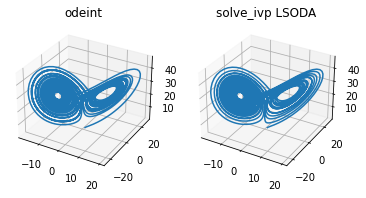

In [5]:
t = np.arange(0.0, 40.0, 0.01)
result_odeint = odeint(lorenz, y0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p,
                             method='LSODA', t_eval=t)
 
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
ax.set_title("odeint")
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp LSODA")